# 1. Set Up Environment

In [1]:
import scipy
print('scipy: %s' % scipy.__version__)
import numpy
print('numpy: %s' % numpy.__version__)
import matplotlib
print('matplotlib: %s' % matplotlib.__version__)
from matplotlib import pyplot
import pandas
print('pandas: %s' % pandas.__version__)
import sklearn
print('sklearn: %s' % sklearn.__version__)
import statsmodels
print('statsmodels: %s' % statsmodels.__version__)

scipy: 1.2.1
numpy: 1.16.4
matplotlib: 3.1.0
pandas: 0.24.2
sklearn: 0.21.2
statsmodels: 0.10.0


In [2]:
from pandas import read_csv
ds = read_csv(r'C:\Users\trent\Dropbox\GitHub\Forecasting\champagne_cleaned.csv', header=0, index_col=3)
print(ds.head())

      Sales  Year  Month
Date                    
48     2815  1964      1
49     2672  1964      2
50     2755  1964      3
51     2721  1964      4
52     2946  1964      5


# 2. Describe Data

In [3]:
print(ds['Sales'].describe())

count      105.000000
mean      4761.152381
std       2553.502601
min       1413.000000
25%       3113.000000
50%       4217.000000
75%       5221.000000
max      13916.000000
Name: Sales, dtype: float64


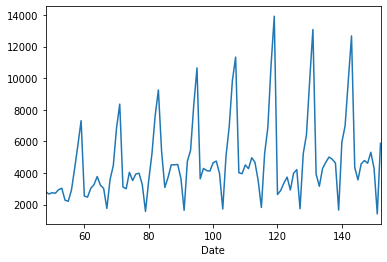

In [4]:
# Line Plots
ds['Sales'].plot()
pyplot.show()

   Sales  Year  Month  Date
0   2815  1964      1    48
1   2672  1964      2    49
2   2755  1964      3    50
3   2721  1964      4    51
4   2946  1964      5    52
0      2815
1      2672
2      2755
3      2721
4      2946
12     2541
13     2475
14     3031
15     3266
16     3776
24     3113
25     3006
26     4047
27     3523
28     3937
36     5375
37     3088
38     3718
39     4514
40     4520
48     3633
49     4292
50     4154
51     4121
52     4647
60     4016
61     3957
62     4510
63     4276
64     4968
72     2639
73     2899
74     3370
75     3740
76     2927
84     3934
85     3162
86     4286
87     4676
88     5010
96     4348
97     3564
98     4577
99     4788
100    4618
Name: Sales, dtype: int64


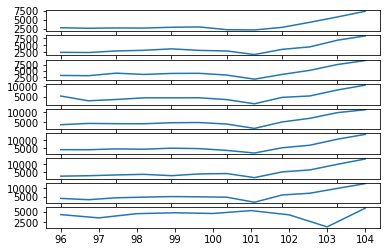

In [5]:
# Seasonal Line Plots

from pandas import DataFrame
ds = read_csv(r'C:\Users\trent\Dropbox\GitHub\Forecasting\champagne_cleaned.csv', header=0)
print(ds.head())
groups = ds['Sales'].groupby(ds['Year'])
print(groups.head())

i=1
n_groups = len(groups)
for name, group in groups:
    pyplot.subplot((n_groups*100) + 10 + i)
    i += 1
    pyplot.plot(group)
pyplot.show()

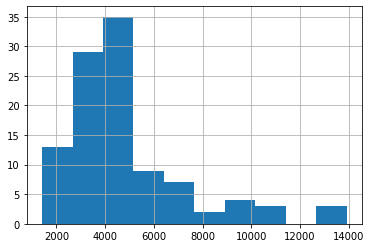

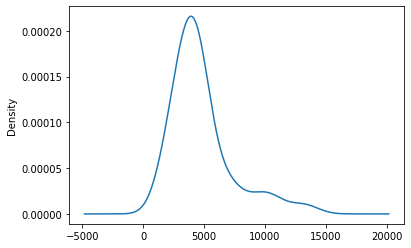

In [6]:
# Density Plots
ds['Sales'].hist()
pyplot.show()
ds['Sales'].plot(kind='kde')
pyplot.show()

# 3. Naive Persistence Benchmark

In [7]:
# set up data
X = ds['Sales'].values
X = X.astype('float32')
X

array([ 2815.,  2672.,  2755.,  2721.,  2946.,  3036.,  2282.,  2212.,
        2922.,  4301.,  5764.,  7312.,  2541.,  2475.,  3031.,  3266.,
        3776.,  3230.,  3028.,  1759.,  3595.,  4474.,  6838.,  8357.,
        3113.,  3006.,  4047.,  3523.,  3937.,  3986.,  3260.,  1573.,
        3528.,  5211.,  7614.,  9254.,  5375.,  3088.,  3718.,  4514.,
        4520.,  4539.,  3663.,  1643.,  4739.,  5428.,  8314., 10651.,
        3633.,  4292.,  4154.,  4121.,  4647.,  4753.,  3965.,  1723.,
        5048.,  6922.,  9858., 11331.,  4016.,  3957.,  4510.,  4276.,
        4968.,  4677.,  3523.,  1821.,  5222.,  6872., 10803., 13916.,
        2639.,  2899.,  3370.,  3740.,  2927.,  3986.,  4217.,  1738.,
        5221.,  6424.,  9842., 13076.,  3934.,  3162.,  4286.,  4676.,
        5010.,  4874.,  4633.,  1659.,  5951.,  6981.,  9851., 12670.,
        4348.,  3564.,  4577.,  4788.,  4618.,  5312.,  4298.,  1413.,
        5877.], dtype=float32)

In [8]:
train_size = int(len(X)*0.5)
train, test = X[0:train_size], X[train_size:]
history = [x for x in train]
history

[2815.0,
 2672.0,
 2755.0,
 2721.0,
 2946.0,
 3036.0,
 2282.0,
 2212.0,
 2922.0,
 4301.0,
 5764.0,
 7312.0,
 2541.0,
 2475.0,
 3031.0,
 3266.0,
 3776.0,
 3230.0,
 3028.0,
 1759.0,
 3595.0,
 4474.0,
 6838.0,
 8357.0,
 3113.0,
 3006.0,
 4047.0,
 3523.0,
 3937.0,
 3986.0,
 3260.0,
 1573.0,
 3528.0,
 5211.0,
 7614.0,
 9254.0,
 5375.0,
 3088.0,
 3718.0,
 4514.0,
 4520.0,
 4539.0,
 3663.0,
 1643.0,
 4739.0,
 5428.0,
 8314.0,
 10651.0,
 3633.0,
 4292.0,
 4154.0,
 4121.0]

In [9]:
# Basic Walk Forward Validation Model

from sklearn.metrics import mean_squared_error
from math import sqrt

predictions = list()
for i in range(len(test)):
    # make a prediction
    yhat = history[-1]
    predictions.append(yhat)
    # add observation to history
    obs = test[i]
    history.append(obs)
    print('predicted=%.3f , actual=%.3f' % (yhat, obs))

mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print(rmse)

predicted=4121.000 , actual=4647.000
predicted=4647.000 , actual=4753.000
predicted=4753.000 , actual=3965.000
predicted=3965.000 , actual=1723.000
predicted=1723.000 , actual=5048.000
predicted=5048.000 , actual=6922.000
predicted=6922.000 , actual=9858.000
predicted=9858.000 , actual=11331.000
predicted=11331.000 , actual=4016.000
predicted=4016.000 , actual=3957.000
predicted=3957.000 , actual=4510.000
predicted=4510.000 , actual=4276.000
predicted=4276.000 , actual=4968.000
predicted=4968.000 , actual=4677.000
predicted=4677.000 , actual=3523.000
predicted=3523.000 , actual=1821.000
predicted=1821.000 , actual=5222.000
predicted=5222.000 , actual=6872.000
predicted=6872.000 , actual=10803.000
predicted=10803.000 , actual=13916.000
predicted=13916.000 , actual=2639.000
predicted=2639.000 , actual=2899.000
predicted=2899.000 , actual=3370.000
predicted=3370.000 , actual=3740.000
predicted=3740.000 , actual=2927.000
predicted=2927.000 , actual=3986.000
predicted=3986.000 , actual=4217

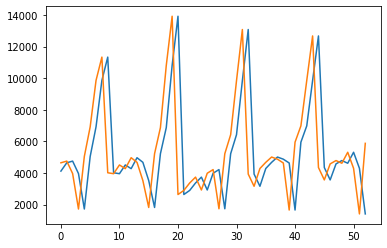

In [10]:
predictions = pandas.DataFrame(predictions)
test2 = pandas.DataFrame(test)
pyplot.plot(predictions)
pyplot.plot(test2)
pyplot.show()

# 4. Manually Configured ARIMA

In [11]:
# First, let's create a validation dataset
ds = read_csv(r'C:\Users\trent\Dropbox\GitHub\Forecasting\champagne_cleaned.csv', header=0, index_col=3)
split_point = len(ds) - 12
dataset, validation = ds[0:split_point], ds[split_point:]
print(len(dataset), len(validation))

93 12


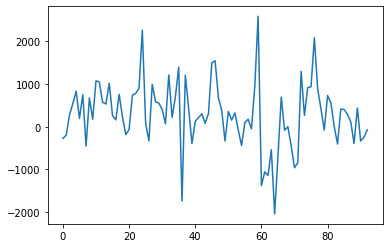

In [12]:
# ARIMA (p,d,q)
# p = number of significant spikes in autocorrelation graph
# d = how many times do we difference the data for it to be stationary
# q = number of significant spikes in partial autocorrelation graph

from statsmodels.tsa.stattools import adfuller
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return diff

# difference the data
months_in_year = 12
stationary = difference(X, months_in_year)
pyplot.plot(stationary)
pyplot.show()

In [13]:
# Check if this series is stationary
result = adfuller(stationary)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key,value))

ADF Statistic: -7.626619
p-value: 0.000000
Critical Values:
	1%: -3.504
	5%: -2.894
	10%: -2.584


In [14]:
# Will also need this function later to invert the difference data
def inverse_diff(history,yhat,interval=1):
    return yhat + history[-interval]

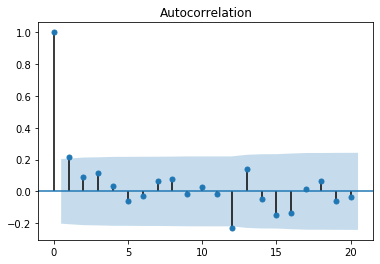

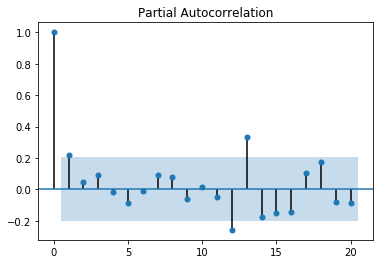

In [15]:
# Now check AC and PAC
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

stationary = pandas.DataFrame(stationary)
plot_acf(stationary, ax=pyplot.gca())
pyplot.show()
plot_pacf(stationary, ax=pyplot.gca())
pyplot.show()

In [16]:
# ARIMA (p,d,q) = (1,1,1)
from statsmodels.tsa.arima_model import ARIMA

history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # difference data
    months_in_year = 12
    diff = difference(history, months_in_year)
    # predict 
    model = ARIMA(diff, order=(1,1,1))
    model_fit = model.fit(trend='nc', disp=0)
    yhat = model_fit.forecast()[0]
    yhat = inverse_diff(history, yhat, months_in_year)
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    print('predicted=%.3f , actual=%.3f' % (yhat, obs))

mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print(rmse)

predicted=5156.557 , actual=4647.000
predicted=5046.670 , actual=4753.000
predicted=4143.810 , actual=3965.000
predicted=2102.963 , actual=1723.000
predicted=5228.315 , actual=5048.000
predicted=5873.367 , actual=6922.000
predicted=8571.352 , actual=9858.000
predicted=11005.986 , actual=11331.000
predicted=4087.458 , actual=4016.000
predicted=4771.838 , actual=3957.000
predicted=4676.128 , actual=4510.000
predicted=4583.383 , actual=4276.000
predicted=5117.348 , actual=4968.000
predicted=5208.147 , actual=4677.000
predicted=4436.431 , actual=3523.000
predicted=2180.882 , actual=1821.000
predicted=5471.251 , actual=5222.000
predicted=7337.577 , actual=6872.000
predicted=10268.338 , actual=10803.000
predicted=11725.394 , actual=13916.000
predicted=4519.494 , actual=2639.000
predicted=4606.047 , actual=2899.000
predicted=4939.092 , actual=3370.000
predicted=4495.261 , actual=3740.000
predicted=5109.012 , actual=2927.000
predicted=4285.915 , actual=3986.000
predicted=3155.259 , actual=4217

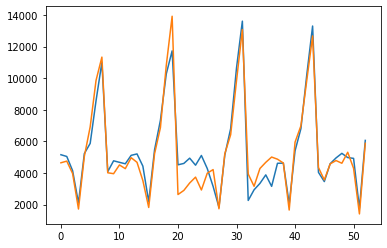

In [17]:
predictions = pandas.DataFrame(predictions)
test2 = pandas.DataFrame(test)
pyplot.plot(predictions)
pyplot.plot(test2)
pyplot.show()

# 5. Grid Search ARIMA Hyperparameters

In [27]:
# ARIMA (p,d,q)

import warnings
warnings.filterwarnings("ignore")

for p in range(0,6):
    for d in range(0,3):
        for q in range(1,6):
            try:    
                history = [x for x in train]
                predictions = list()
                for i in range(len(test)):
                    # difference data
                    months_in_year = 12
                    diff = difference(history, months_in_year)
                    # predict 
                    model = ARIMA(diff, order=(p,d,q))
                    model_fit = model.fit(trend='nc', disp=0)
                    yhat = model_fit.forecast()[0]
                    yhat = inverse_diff(history, yhat, months_in_year)
                    predictions.append(yhat)
                    # observation
                    obs = test[i]
                    history.append(obs)
                    #print('predicted=%.3f , actual=%.3f' % (yhat, obs))
                
                mse = mean_squared_error(test, predictions)
                rmse = sqrt(mse)
                print(p, d, q, rmse)
                
            except:
                continue

0 0 1 785.4011028202641
0 0 2 808.6519886306977
0 0 3 818.6490353020409
0 0 4 826.0281647337152
0 0 5 857.5928714549138
0 1 1 842.2400348205223
0 2 1 913.9841267208375
1 1 1 840.2670747014866
2 0 1 834.4717636903059
2 1 1 866.872231538042
2 2 1 918.7485125461009
3 1 1 872.366563469642
4 0 1 809.5038403278826
4 1 1 908.9235972284147
4 2 1 938.5975021873392
5 0 1 854.215609621334
5 0 2 832.2065194286596
5 1 1 921.9016400692778
5 1 2 904.2990816072141
5 2 1 943.1893639557156


In [28]:
# ARIMA (0,0,1) minimizes the rmse=785.

history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # difference data
    months_in_year = 12
    diff = difference(history, months_in_year)
    # predict 
    model = ARIMA(diff, order=(0,0,1))
    model_fit = model.fit(trend='nc', disp=0)
    yhat = model_fit.forecast()[0]
    yhat = inverse_diff(history, yhat, months_in_year)
    predictions.append(yhat)
    # observation
    obs = test[i]
    history.append(obs)
    print('predicted=%.3f , actual=%.3f' % (yhat, obs))

mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print(rmse)

predicted=4455.107 , actual=4647.000
predicted=4567.683 , actual=4753.000
predicted=3691.090 , actual=3965.000
predicted=1684.956 , actual=1723.000
predicted=4744.831 , actual=5048.000
predicted=5474.600 , actual=6922.000
predicted=8556.384 , actual=9858.000
predicted=10925.314 , actual=11331.000
predicted=3726.032 , actual=4016.000
predicted=4360.617 , actual=3957.000
predicted=4059.717 , actual=4510.000
predicted=4223.040 , actual=4276.000
predicted=4659.008 , actual=4968.000
predicted=4823.543 , actual=4677.000
predicted=3931.824 , actual=3523.000
predicted=1629.240 , actual=1821.000
predicted=5091.520 , actual=5222.000
predicted=6951.792 , actual=6872.000
predicted=9839.749 , actual=10803.000
predicted=11548.695 , actual=13916.000
predicted=4687.849 , actual=2639.000
predicted=3636.164 , actual=2899.000
predicted=4369.347 , actual=3370.000
predicted=4055.001 , actual=3740.000
predicted=4897.697 , actual=2927.000
predicted=4221.788 , actual=3986.000
predicted=3470.510 , actual=4217.

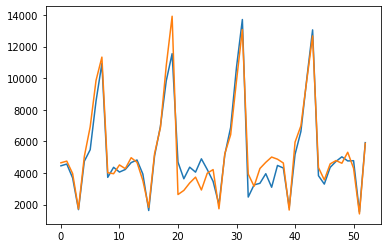

In [29]:
predictions = pandas.DataFrame(predictions)
test2 = pandas.DataFrame(test)
pyplot.plot(predictions)
pyplot.plot(test2)
pyplot.show()